In [1]:
!pip install opencv-python
!pip install matplotlib

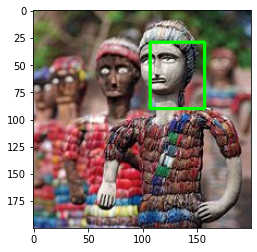

In [7]:
import cv2
from matplotlib import pyplot as plt

def detect_blindness(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply an adaptive threshold to binarize the image
    _, threshold = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if any contours are detected
    if len(contours) == 0:
        print("No contours found. The image is not suitable for blindness detection.")
        return
    
    # Calculate the area of each contour
    contour_areas = [cv2.contourArea(contour) for contour in contours]
    
    # Find the index of the largest contour
    largest_contour_index = contour_areas.index(max(contour_areas))
    
    # Extract the bounding box coordinates of the largest contour
    (x, y, w, h) = cv2.boundingRect(contours[largest_contour_index])
    
    # Draw the bounding box on the image
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Display the original image with the bounding box
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('on')
    plt.show()

# Specify the path to the image you want to analyze
image_path = r"C:\Users\Anubha\Downloads\Taj Mahal _ Definition_ Story_ Site_ History_ &_yyt\Chandigarh. Statuettes at the Rock Garden of Chandi.jpg"
# Call the detect_blindness function
detect_blindness(image_path)